# Game screenshot processing

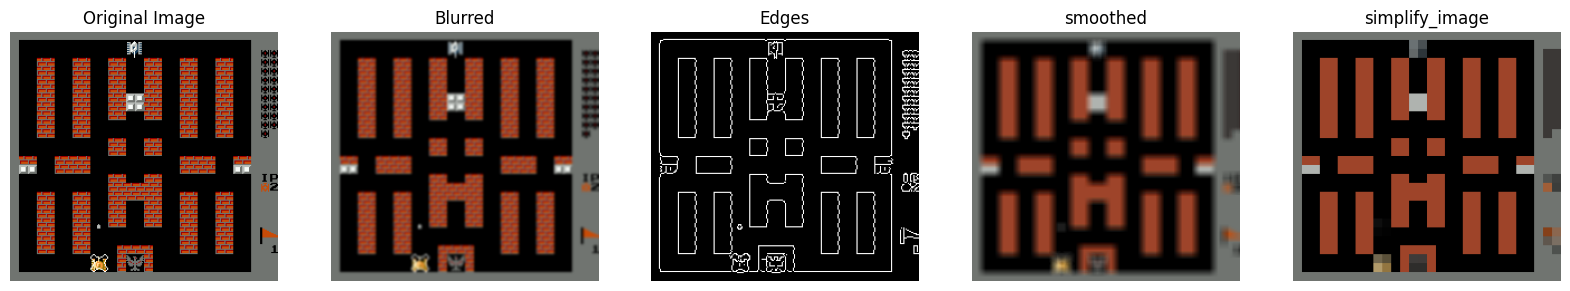

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image
image = cv2.imread('../screenshot/4055.png')

# Blur the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Detect edges
edges = cv2.Canny(blurred, 100, 200)

# -----------------------------------------
# Get image size
height, width, channels = image.shape

# Create a new image with the same size
simplify_image = np.zeros((height, width, channels), np.uint8)

# Set block size
block_size = 8

# Traverse all blocks
for y in range(0, height, block_size):
    for x in range(0, width, block_size):
        #  Get a block
        block = image[y:y+block_size, x:x+block_size]

        # Calculate the average color of the block
        average_color = block.mean(axis=(0, 1))

        # Set the block to the average color
        simplify_image[y:y+block_size, x:x+block_size] = average_color

#--------------------------------
# Create a 8x8 kernel
kernel_size = 8
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
smoothed = cv2.filter2D(image, -1, kernel)


#--------------------------------
# Create a 1x2 subplots
imageList = [image, blurred, edges, smoothed, simplify_image]
titles = ['Original Image', 'Blurred', 'Edges', 'smoothed', 'simplify_image']

# Create a figure
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

# Show the image
for i, ax in enumerate(axes.flat):
    # Convert image to RGB color space
    ax.imshow(cv2.cvtColor(imageList[i], cv2.COLOR_BGR2RGB))
    ax.set_title(titles[i])
    ax.axis('off')

plt.show()


In [3]:
import cv2
template = cv2.imread("../ais/kane/worker/BattleCity_Nes/assets/player1_tank.png")

# Load the frame
frame = cv2.imread("../screenshot/4055.png")

# Find the position of the element in the frame
position = cv2.matchTemplate(frame, template, cv2.TM_CCOEFF_NORMED)

# Get the position of the element
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(position)

print(max_loc)

(72, 199)


In [12]:
import cv2
import numpy as np


template = cv2.imread("../ais/kane/worker/BattleCity_Nes/assets/player1_tank.png")
target = cv2.imread("../screenshot/4055.png")


result = cv2.matchTemplate(target, template, cv2.TM_CCOEFF_NORMED)


threshold = 0.6


yloc, xloc = np.where(result >= threshold)


for (x, y) in zip(xloc, yloc):
    cv2.rectangle(target, (x, y), (x + template.shape[1], y + template.shape[0]), (0, 255, 255), 2)


cv2.imshow("Matched Locations", target)
cv2.waitKey(0)
cv2.destroyAllWindows()
